In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datetime import date
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sentence_transformers.util import semantic_search
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import sys

plastics_path = '/Users/ckruse/Documents/earthrise/plastics'
if plastics_path in sys.path:
    sys.path.remove('/Users/ckruse/Documents/earthrise/plastics')
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from scripts import dl_utils
from scripts import viz_tools

In [84]:
def compute_ndvi(pixel_arrays):
    return (pixel_arrays[:,:,7] - pixel_arrays[:,:,3]) / (pixel_arrays[:,:,7] + pixel_arrays[:,:,3])

In [87]:
resolution = 25

input_data_files = ['amazonas_2020_thresh_0.5postraining_patches_2020-01-01_2020-07-01_28px',
                    'amazonas_2020_thresh_0.5negtraining_patches_2020-01-01_2020-07-01_28px',
                    'MinesNeg2018-2020Sentinel_patches_2020-01-01_2020-07-01_28px',
                    'MinesPos2018-2020Sentinel_patches_2020-01-01_2020-07-01_28px',
                    'bolivar_2020_thresh_0.8negtraining_patches_2020-01-01_2020-07-01_28px',
                    'bolivar_2020_thresh_0.8postraining_patches_2020-01-01_2020-07-01_28px',
                    'bolivar_2020-06_negatives_patches_2020-01-01_2020-07-01_28px',
                    '28_px_bolivar_amazonas_v7_validated_cloudy_negatives_448',
                    '28_px_corrupted'
                   ]

images = []
labels = []

data_dir = os.path.join('..', 'data', 'training_data')

file = input_data_files[3]

with open(os.path.join(data_dir, file + '_patches.pkl'), 'rb') as f:
    data = pickle.load(f)
    for elem in data:
        patch = dl_utils.pad_patch(elem, resolution)
        images.append(patch)
with open(os.path.join(data_dir, file + '_patch_labels.pkl'), 'rb') as f:
    label = pickle.load(f)
    labels = np.concatenate((labels, label))

images = np.array(images)
print(len(images), "samples loaded")
print(sum(labels == 1), "positive samples")
print(sum(labels == 0), "negative samples")

205 samples loaded
205 positive samples
0 negative samples


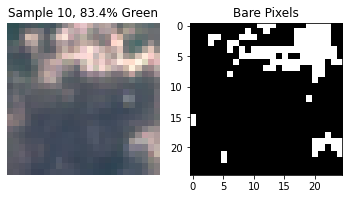

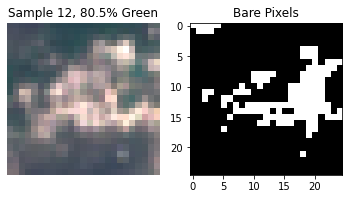

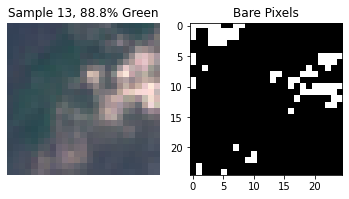

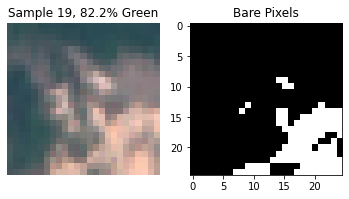

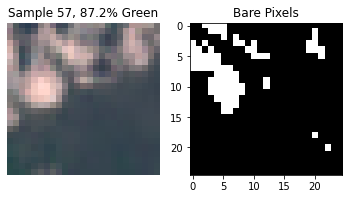

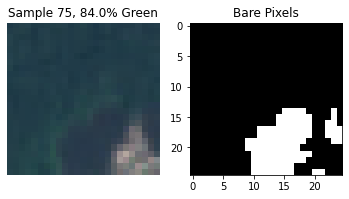

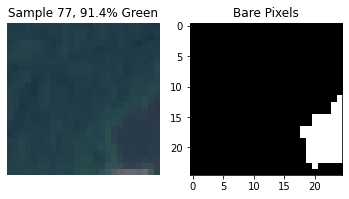

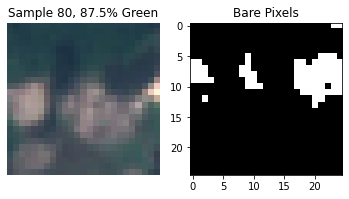

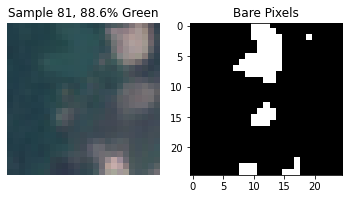

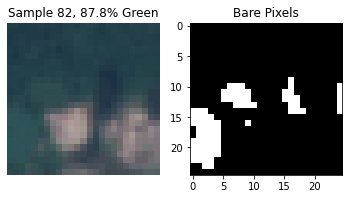

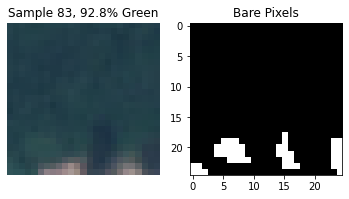

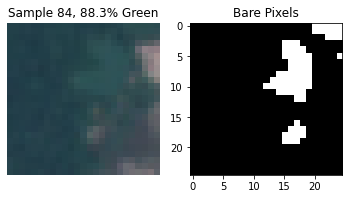

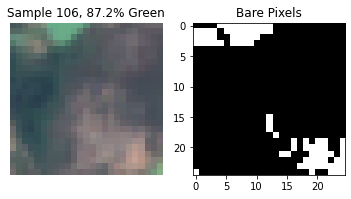

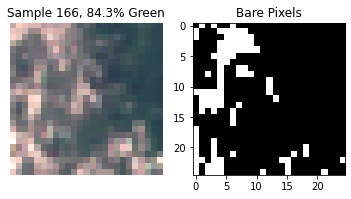

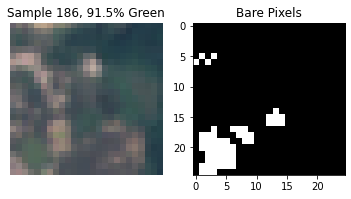

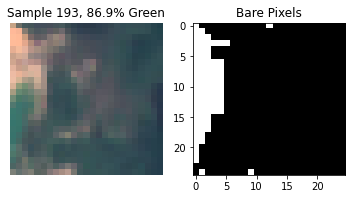

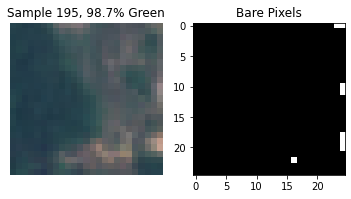

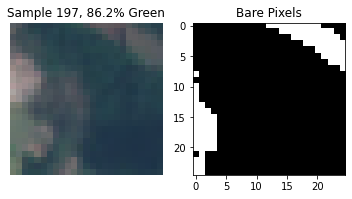

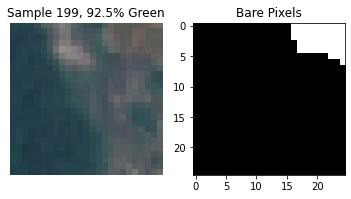

In [97]:
ndvi = [compute_ndvi(image / 3000) for image in images]
ndvi_threshold = 0.2
bare_percent = [np.sum(sample < ndvi_threshold) / np.size(sample) for sample in ndvi]
bare_pct_threshold = 0.2
candidates = np.where(np.array(bare_percent) < bare_pct_threshold)[0]
for candidate in candidates:
    plt.subplot(1,2,1)
    plt.imshow(np.clip(images[candidate][:,:,3:0:-1] / 2500, 0,1))
    plt.axis('off')
    plt.title(f"Sample {candidate}, {1 - bare_percent[candidate]:.1%} Green")
    plt.subplot(1,2,2)
    im_ndvi = compute_ndvi(images[candidate] / 3000)
    mask_ndvi = np.ma.masked_where(im_ndvi > ndvi_threshold, im_ndvi)
    plt.imshow(mask_ndvi.mask, cmap='binary')
    plt.title('Bare Pixels')
    plt.show()

In [40]:
np.where(np.sum(ndvi[0] < 0.2) / np.size(ndvi[0]) < 0.1)

(array([], dtype=int64),)

In [39]:
np.sum(ndvi[0] < 0.2) / np.size(ndvi[0])

0.2496

In [ ]:
candidates = 

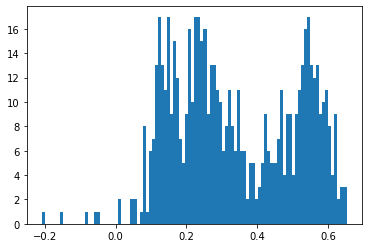

In [23]:
plt.hist(compute_ndvi(images[0] / 3000).flatten(), bins=100);

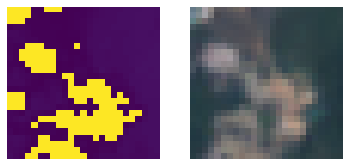

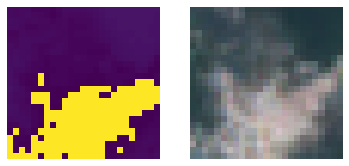

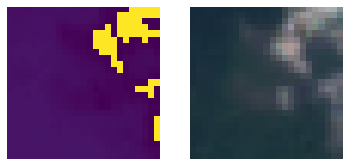

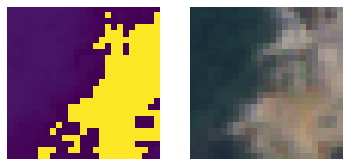

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


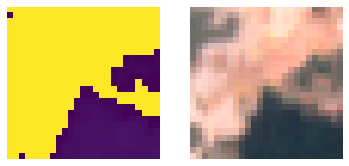

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


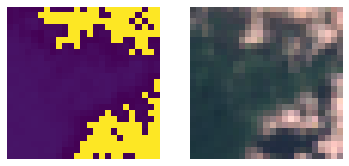

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


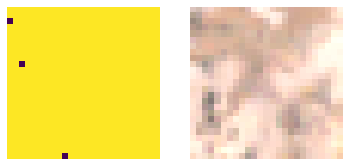

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


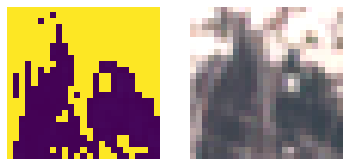

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


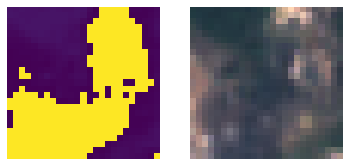

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


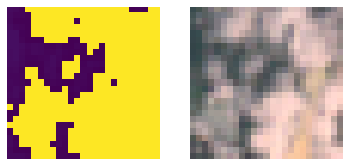

In [34]:
for image in images[:10]:

    ndvi = compute_ndvi(image / 3000)
    threshold = 0.2
    ndvi[ndvi < threshold] = 10
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.imshow(ndvi)
    plt.subplot(1,2,2)
    plt.imshow(image[:,:,3:0:-1] / 3000)
    plt.axis('off')
    plt.show()

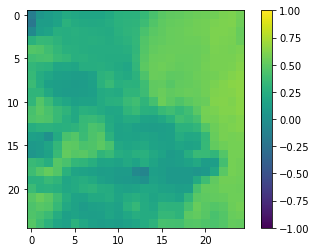

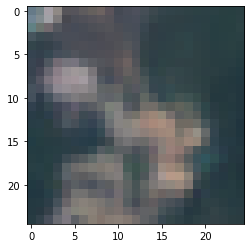

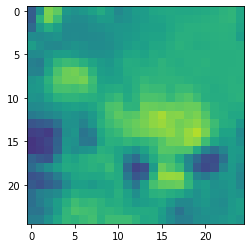

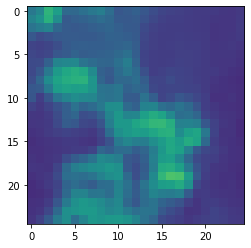

In [20]:
plt.imshow(compute_ndvi(images[0] / 3000), vmin=-1, vmax=1)
plt.colorbar()
plt.show()
plt.imshow(images[0][:,:,3:0:-1] / 3000)
plt.show()
plt.imshow(images[0][:,:,7] / 3000, vmin=0, vmax=1)
plt.show()
plt.imshow(images[0][:,:,3] / 3000, vmin=0, vmax=1)
plt.show()